<img src="cubes.png">

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("database.csv", sep="\t")

In [2]:
# Creazione funzione per convertire i secondi in minuti e secondi
def convert_seconds(seconds):
    minutes, seconds = divmod(seconds, 60)
    minutes = int(minutes)
    seconds = round(seconds, 2)
    return f"{minutes}:{seconds}"

In [3]:
# Inserimento colonna "Tempo" con i secondi convertiti in minuti ei secondi
df.insert(loc=2, column="Tempo", value=df["Secondi"].apply(convert_seconds))

In [4]:
# Ultime 10 risoluzioni
df.tail(10)

,Data,Secondi,Tempo,Cubo
78,2025-03-09,56.58,0:56.58,3x3
79,2025-03-09,53.06,0:53.06,2x2
80,2025-03-09,51.28,0:51.28,2x2
81,2025-03-09,15.66,0:15.66,2x2
82,2025-03-21,85.99,1:25.99,2x2
83,2025-03-21,24.74,0:24.74,2x2
84,2025-03-21,15.12,0:15.12,2x2
85,2025-03-21,62.70,1:2.7,3x3
86,2025-03-21,57.39,0:57.39,3x3
87,2025-03-21,74.59,1:14.59,3x3


# Record personali per tipo di cubo 🥇🥈🥉

In [6]:
# Record personali per tipo di cubo
df.groupby(by="Cubo").min().sort_values(by="Secondi").drop(columns=["Data", "Secondi"])

,Tempo
Cubo,
2x2,0:15.12
3x3,0:54.39
4x4,3:38.12
5x5,10:52.34
Mirror,12:24.1
Megaminx,30:10.61


In [ ]:
# Record personali per tipo di cubo
# df.groupby(by="Cubo").min().sort_values(by="Secondi")
# Questo mostra la data sbagliata in quanto prende pure la data minima in quanto applica min su tutte le colonne

Text(0.5, 0, 'Cubi')

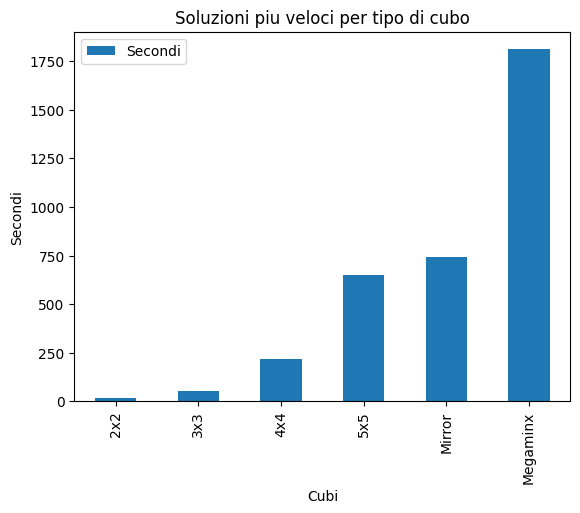

In [8]:
df.groupby(by="Cubo").min().sort_values(by="Secondi").plot.bar()
plt.title("Soluzioni piu veloci per tipo di cubo")
plt.ylabel("Secondi")
plt.xlabel("Cubi")

In [9]:
# Medie dei tempi di risoluzione
medie_df = df.groupby(by="Cubo")["Secondi"].mean().round(2)
medie_df

Cubo
2x2           70.87
3x3           79.89
4x4          285.94
5x5          864.65
Megaminx    1917.06
Mirror       819.45
Name: Secondi, dtype: float64

In [10]:
# Medie dei tempi di risoluzione in minuti e secondi
for i, s in medie_df.items():
    print(i, convert_seconds(s))

2x2 1:10.87
3x3 1:19.89
4x4 4:45.94
5x5 14:24.65
Megaminx 31:57.06
Mirror 13:39.45


Text(0.5, 0, 'Cubi')

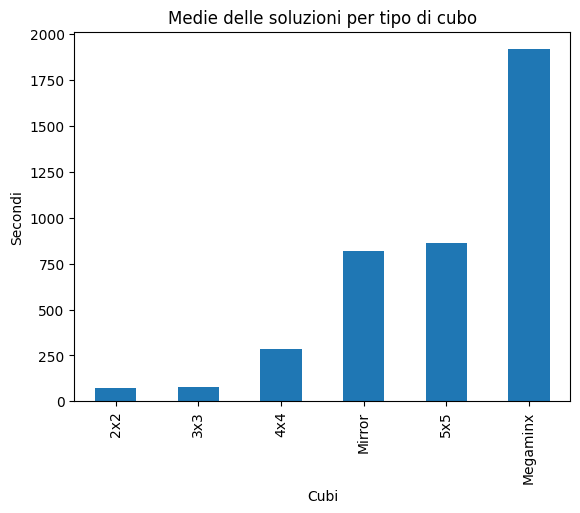

In [11]:
df.groupby(by="Cubo")["Secondi"].mean().sort_values().plot.bar()
plt.title("Medie delle soluzioni per tipo di cubo")
plt.ylabel("Secondi")
plt.xlabel("Cubi")

In [12]:
# Numero di volte che ho risolto i cubi
df["Cubo"].value_counts()

Cubo
3x3         37
2x2         29
4x4         11
5x5          6
Mirror       3
Megaminx     2
Name: count, dtype: int64

Text(0.5, 0, 'Cubi')

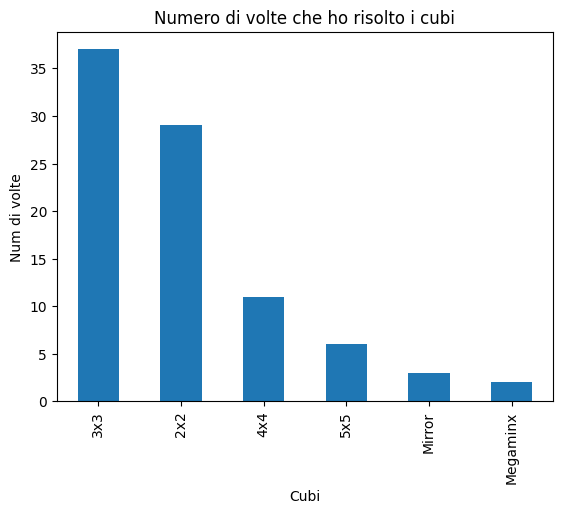

In [13]:
df["Cubo"].value_counts().plot.bar()
plt.title("Numero di volte che ho risolto i cubi")
plt.ylabel("Num di volte")
plt.xlabel("Cubi")

In [14]:
# Detaframe delle soluzioni del cubo 2x2
df_2x2 = df[df["Cubo"] == "2x2"].sort_values(by="Secondi")
df_2x2

,Data,Secondi,Tempo,Cubo
84,2025-03-21,15.12,0:15.12,2x2
81,2025-03-09,15.66,0:15.66,2x2
83,2025-03-21,24.74,0:24.74,2x2
68,2025-02-22,26.90,0:26.9,2x2
30,2025-01-26,28.12,0:28.12,2x2
71,2025-02-23,28.13,0:28.13,2x2
24,2025-01-18,32.24,0:32.24,2x2
70,2025-02-23,35.07,0:35.07,2x2
21,2025-01-18,36.84,0:36.84,2x2
31,2025-01-26,39.25,0:39.25,2x2


In [15]:
# Detaframe delle soluzioni del cubo 3x3
df_3x3 = df[df["Cubo"] == "3x3"].sort_values(by="Secondi")
df_3x3

,Data,Secondi,Tempo,Cubo
55,2025-02-13,54.39,0:54.39,3x3
59,2025-02-14,54.88,0:54.88,3x3
74,2025-02-23,55.66,0:55.66,3x3
41,2025-02-02,56.01,0:56.01,3x3
78,2025-03-09,56.58,0:56.58,3x3
86,2025-03-21,57.39,0:57.39,3x3
13,2025-01-18,58.14,0:58.14,3x3
75,2025-02-23,58.22,0:58.22,3x3
60,2025-02-14,58.61,0:58.61,3x3
77,2025-03-09,60.42,1:0.42,3x3


In [16]:
# Detaframe delle soluzioni del cubo 4x4
df_4x4 = df[df["Cubo"] == "4x4"].sort_values(by="Secondi")
df_4x4

,Data,Secondi,Tempo,Cubo
18,2025-01-18,218.12,3:38.12,4x4
69,2025-02-23,223.11,3:43.11,4x4
17,2025-01-18,227.47,3:47.47,4x4
25,2025-01-19,246.79,4:6.79,4x4
27,2025-01-19,251.41,4:11.41,4x4
51,2025-02-10,279.59,4:39.59,4x4
29,2025-01-26,290.00,4:50.0,4x4
16,2025-01-18,294.18,4:54.18,4x4
46,2025-02-07,323.58,5:23.58,4x4
26,2025-01-19,373.76,6:13.76,4x4


In [17]:
# Detaframe delle soluzioni del cubo 5x5
df_5x5 = df[df["Cubo"] == "5x5"].sort_values(by="Secondi")
df_5x5

,Data,Secondi,Tempo,Cubo
76,2025-03-08,652.34,10:52.34,5x5
62,2025-02-21,740.90,12:20.9,5x5
47,2025-02-07,863.61,14:23.61,5x5
33,2025-01-26,903.46,15:3.46,5x5
15,2025-01-18,937.12,15:37.12,5x5
52,2025-02-10,1090.49,18:10.49,5x5


In [18]:
media_5x5 = df_5x5["Secondi"].mean()
convert_seconds(media_5x5)

'14:24.65'